In [14]:
# import python packages 
from meteostat import Point, Stations, Daily
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


from IPython.display import display

# import from own modules
import sql as gd
import api

# change options
pd.set_option('display.max_columns', None)
"""
https://github.com/python-pillow/Pillow/issues/5257
"""

'\nhttps://github.com/python-pillow/Pillow/issues/5257\n'

In [62]:
us_stations_df = pd.read_csv('data/us_weather_stations.csv')

# from: https://www.faa.gov/airports/airport_safety/airportdata_5010/menu/#datadownloads
airports_data = pd.read_csv('data/NfdcFacilities.csv', sep=';')

# keep needed columns
airports_data = airports_data[['Type', 'LocationID', 'Region', 'City', 'CountyState', 'IcaoIdentifier']] 

# clean data and rename columns
def clean_data(df):
    df['LocationID'] = [string.strip("'") for string in df['LocationID']]
    df.columns = [col.replace(col, col.lower()) for col in df.columns]

clean_data(airports_data)

# filter only rows of the 6 airports we are interested in
locations = airports_data[airports_data['locationid'].isin(['BOS', 'EWR', 'JFK', 'MIA', 'PHL', 'SJU'])]

# create a list of icao ids of the location to pass to the API
icao_list = locations['icaoidentifier'].tolist()

In [4]:
# get all weather stations in us and puerto rico
# api.get_weather_stations('PR', 'data/pr_weather_stations.csv')

In [63]:
# find the weather stations near the 6 relevant airports
us_stations_df = pd.read_csv('data/us_weather_stations.csv')

# create dataframe of weather stations in Puerto Rico
pr_stations_df = pd.read_csv('data/pr_weather_stations.csv')

# create a dataframe of all weather stations in US and Puerto Rico
all_weather_stations_df = pd.concat([us_stations_df, pr_stations_df], axis=0)

# filter dataframe on the icao identifiers of the 6 airports
weather_stations_df = all_weather_stations_df[all_weather_stations_df['icao'].isin(icao_list)]
display(weather_stations_df)

,id,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end
110,72202,Miami International Airport,US,FL,72202.0,KMIA,25.7833,-80.3167,4.0,America/New_York,1973-01-01,2021-11-04,1948-01-01,2021-11-01,1948-01-01,2021-01-01
266,72408,Philadelphia International Airport,US,PA,72408.0,KPHL,39.8667,-75.2333,6.0,America/New_York,1973-01-01,2021-11-04,1940-07-01,2021-11-01,1940-01-01,2021-01-01
336,72502,Newark Airport,US,NJ,72502.0,KEWR,40.6833,-74.0000,5.0,America/New_York,1973-01-01,2021-11-04,1893-01-01,2021-11-01,1893-01-01,2021-01-01
343,72509,Boston Logan International,US,MA,72509.0,KBOS,42.3667,-71.0167,6.0,America/New_York,1943-11-21,2021-11-04,1936-01-01,2021-11-01,1936-01-01,2021-01-01
532,74486,John F. Kennedy Airport,US,NY,74486.0,KJFK,40.6333,-73.7667,4.0,America/New_York,1973-01-01,2021-11-04,1948-07-17,2021-11-01,1948-01-01,2021-01-01
0,78526,"San Juan / Int., Puerto Rico",PR,NaN,78526.0,TJSJ,18.4333,-66.0000,3.0,America/Puerto_Rico,2005-01-01,2021-11-05,1941-06-17,2021-11-02,1941-01-01,2021-01-01


In [6]:
# create a list of the weather station ids to pass to the api
# weather_stations_list = weather_stations_df['id'].tolist()
# display(weather_stations_list)

In [4]:
# start = datetime(2012, 10, 15)
# end = datetime(2012, 10, 15)
# id = '72202' # station id?

# data = Daily(id, start, end) 
# data = data.fetch()

# display(data)
#sj_id = data.to_csv('data/sj_id.csv')

In [5]:
# start = datetime(2012, 10, 15)
# end = datetime(2012, 10, 15)
# point_sj = Point(18.4333, -66, 9)

# data = Daily(point_sj, start, end) 
# data = data.fetch()

# display(data)
# sj_point = data.to_csv('data/sj_point.csv')

# --> different data is returned, depending if the id is used 
    # or a point is created by using the lat and lon values connected to that id
    # I am going to use the lat and lon values due to this issue

In [64]:
# in order to use lat and lon values I am going to create a dictionary with:
    # key = icao
    # values = latitude, longitude
stations_dict = dict()
for i in range(len(weather_stations_df)):
    key = weather_stations_df['icao'].iloc[i]
    stations_dict[key] = weather_stations_df['latitude'].iloc[i], weather_stations_df['longitude'].iloc[i]
    
display(stations_dict)

{'KMIA': (25.7833, -80.3167),
 'KPHL': (39.8667, -75.2333),
 'KEWR': (40.6833, -74.0),
 'KBOS': (42.3667, -71.0167),
 'KJFK': (40.6333, -73.7667),
 'TJSJ': (18.4333, -66.0)}

In [7]:
# start = datetime(2012, 10, 1)
# end = datetime(2012, 11, 30) 
# api.get_weather_daily(stations_dict, start, end, 'data/weather_oct_nov.csv')

,icao,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,,
2012-10-01,KMIA,26.7,24.4,28.3,45.0,NaN,NaN,10.8,NaN,1010.4,NaN
2012-10-02,KMIA,26.4,23.3,30.6,17.8,NaN,NaN,8.6,NaN,1014.4,NaN
2012-10-03,KMIA,28.3,24.4,32.2,3.6,NaN,NaN,11.2,NaN,1019.1,NaN
2012-10-04,KMIA,28.6,25.0,32.2,1.8,NaN,83.9,12.2,NaN,1019.8,NaN
2012-10-05,KMIA,29.0,26.7,31.7,0.3,NaN,80.0,12.6,NaN,1016.6,572.0
...,...,...,...,...,...,...,...,...,...,...,...
2012-11-26,TJSJ,28.0,26.7,30.6,0.0,0.0,52.5,18.0,NaN,1017.4,NaN
2012-11-27,TJSJ,27.7,25.6,30.0,0.0,0.0,NaN,11.5,NaN,1016.5,NaN
2012-11-28,TJSJ,27.0,24.4,31.1,4.8,0.0,NaN,9.0,NaN,1015.1,NaN


In [5]:
# Code	Meaning
# TEMP	Air Temperature
# TAVG	Average Temperature
# TMIN	Minimum Temperature
# TMAX	Maximum Temperature
# DWPT	Dew Point
# PRCP	Total Precipitation
# WDIR	Wind Direction
# WSPD	Average Wind Speed
# WPGT	Wind Peak Gust
# RHUM	Relative Humidity
# PRES	Sea-Level Air Pressure
# SNOW	Snow Depth
# TSUN	Total Sunshine Duration
# COCO	Weather Condition Code
# #

In [9]:
# create a dataframe with the weather data
data = pd.read_csv('data/weather_oct_nov.csv')

# change time column to datatime data type
data['time'] = pd.to_datetime(data['time'])
display(data)

,time,icao,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2012-10-01,KMIA,26.7,24.4,28.3,45.0,NaN,NaN,10.8,NaN,1010.4,NaN
1,2012-10-02,KMIA,26.4,23.3,30.6,17.8,NaN,NaN,8.6,NaN,1014.4,NaN
2,2012-10-03,KMIA,28.3,24.4,32.2,3.6,NaN,NaN,11.2,NaN,1019.1,NaN
3,2012-10-04,KMIA,28.6,25.0,32.2,1.8,NaN,83.9,12.2,NaN,1019.8,NaN
4,2012-10-05,KMIA,29.0,26.7,31.7,0.3,NaN,80.0,12.6,NaN,1016.6,572.0
...,...,...,...,...,...,...,...,...,...,...,...,...
361,2012-11-26,TJSJ,28.0,26.7,30.6,0.0,0.0,52.5,18.0,NaN,1017.4,NaN
362,2012-11-27,TJSJ,27.7,25.6,30.0,0.0,0.0,NaN,11.5,NaN,1016.5,NaN
363,2012-11-28,TJSJ,27.0,24.4,31.1,4.8,0.0,NaN,9.0,NaN,1015.1,NaN
364,2012-11-29,TJSJ,27.2,24.4,30.6,5.6,0.0,NaN,11.9,NaN,1014.6,NaN


In [12]:
# save weather data to database
# table_name = 'group4_weather_data'
# gd.save_to_db(data, table_name)

The group4_weather_data table was imported successfully.


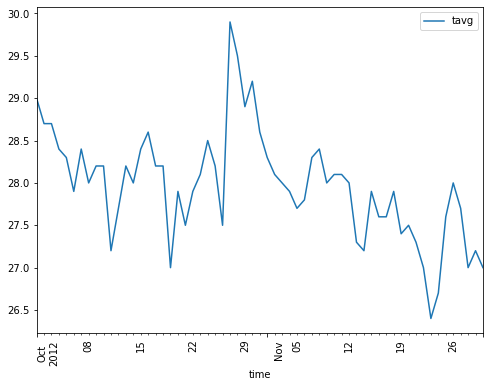

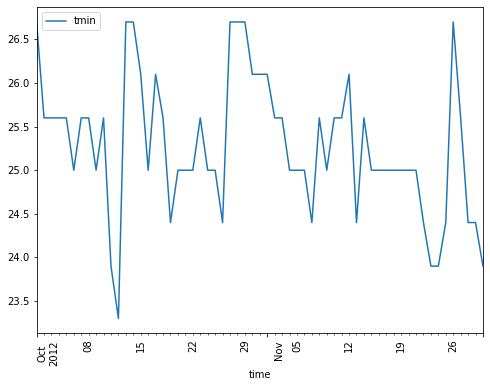

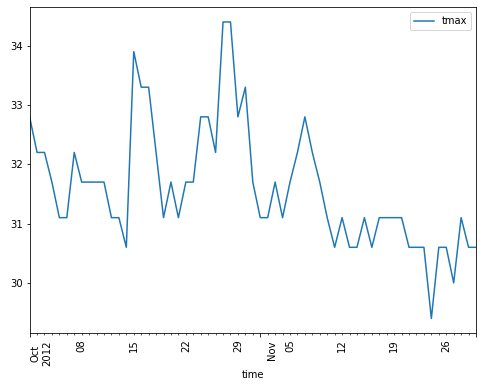

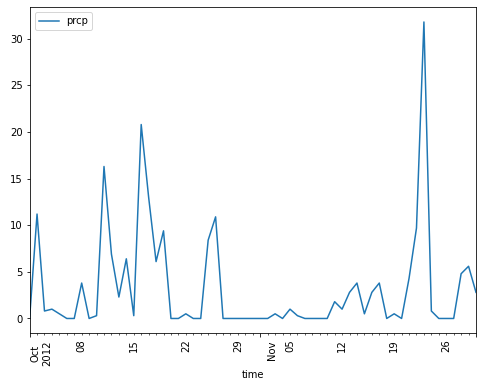

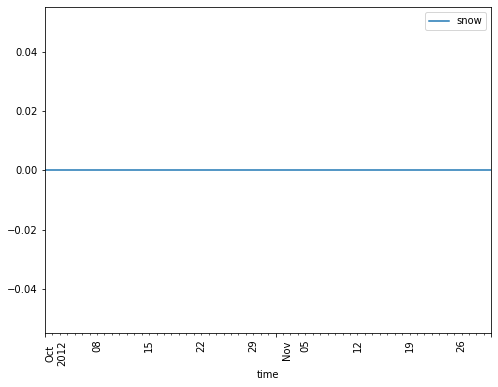

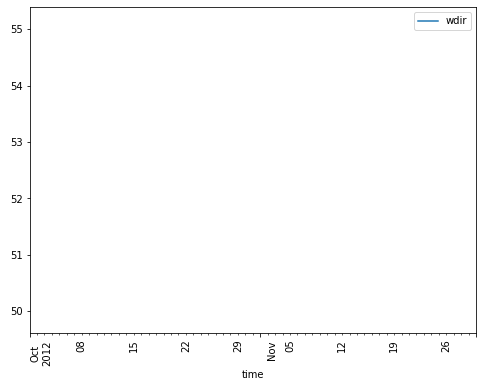

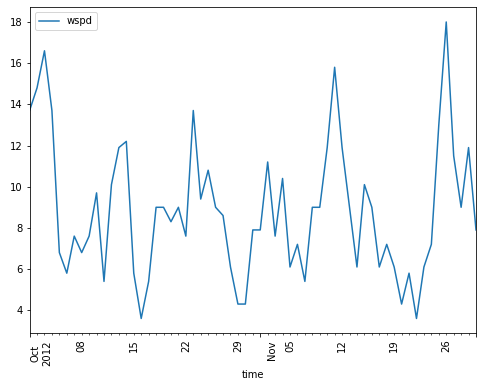

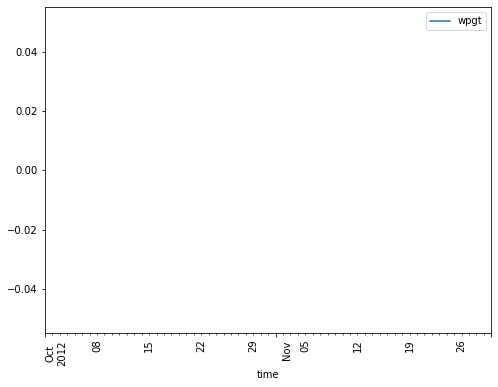

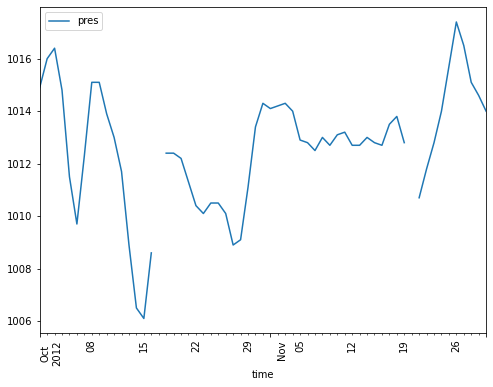

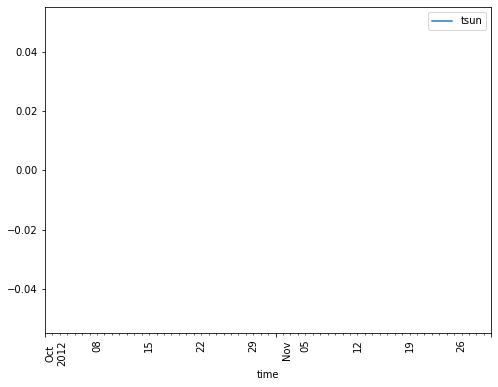

In [53]:
column_list = data.columns
for col in column_list[2:]:
    data[data['icao'] == 'TJSJ'].plot(kind='line', x='time', y=col, figsize=(8,6), rot=90)

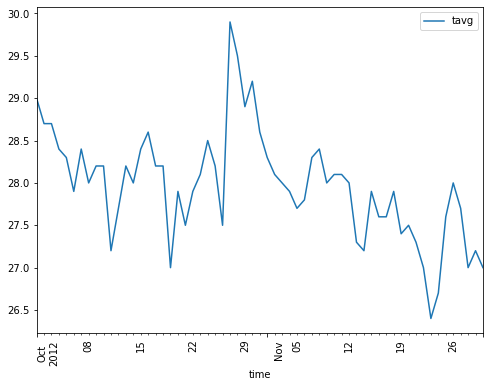

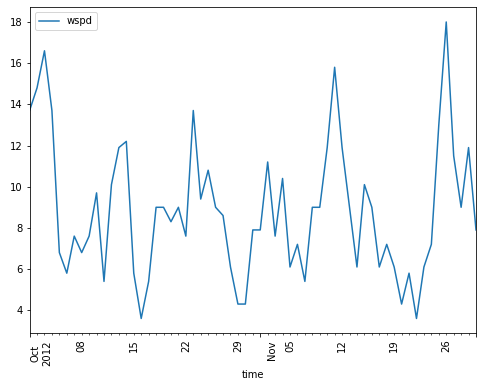

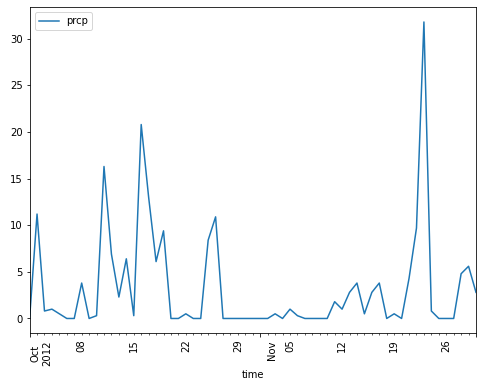

In [55]:
# good to work with temperature and windspeed
# maybe perspiration

column_list = ['tavg', 'wspd', 'prcp']
for col in column_list:
    data[data['icao'] == 'TJSJ'].plot(kind='line', x='time', y=col, figsize=(8,6), rot=90)

In [67]:
display(stations_dict)
# create a list of airports ordered by the course of the hurricane
ordered_airports = ['TJSJ', 'KMIA', 'KPHL', 'KJFK', 'KEWR', 'KBOS']

{'KMIA': (25.7833, -80.3167),
 'KPHL': (39.8667, -75.2333),
 'KEWR': (40.6833, -74.0),
 'KBOS': (42.3667, -71.0167),
 'KJFK': (40.6333, -73.7667),
 'TJSJ': (18.4333, -66.0)}

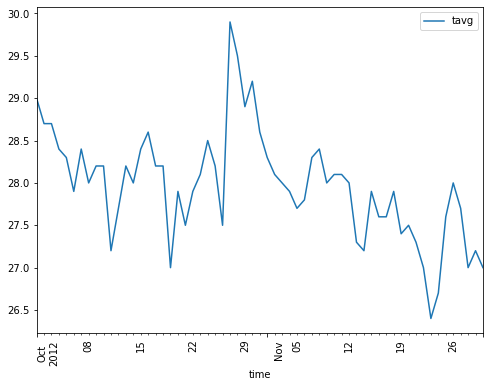

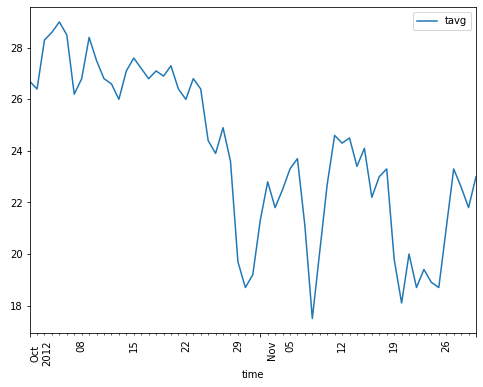

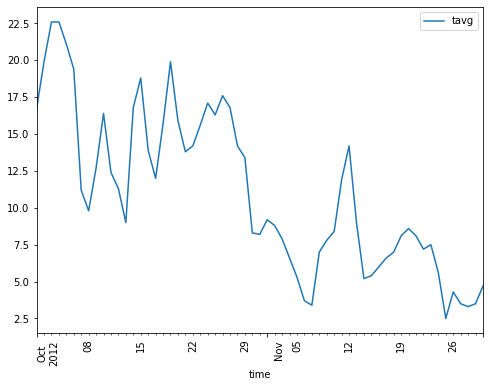

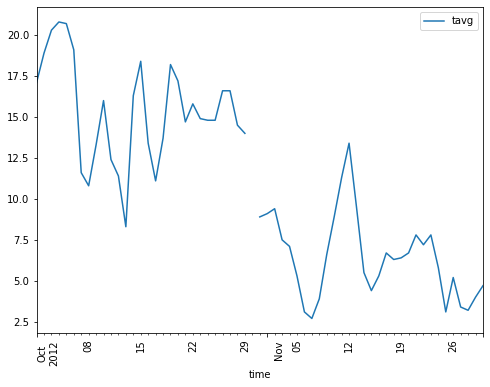

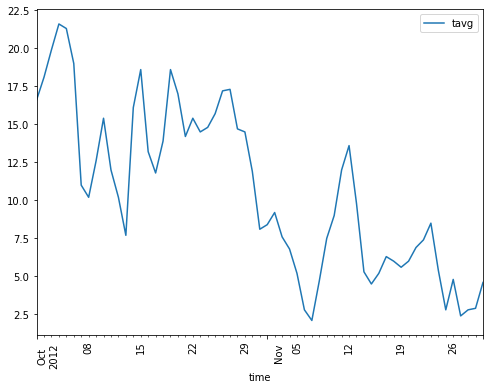

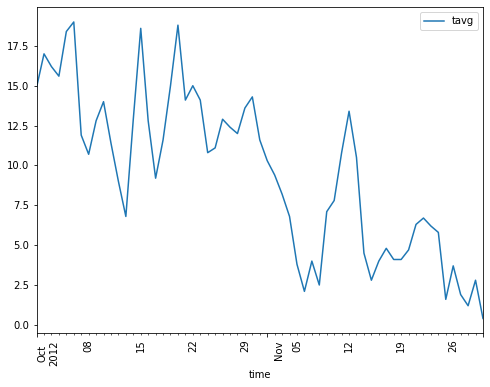

In [68]:
# plot only the average temperature for all airports
for airport in ordered_airports:
    data[data['icao'] == airport].plot(kind='line', x='time', y='tavg', figsize=(8,6), rot=90)

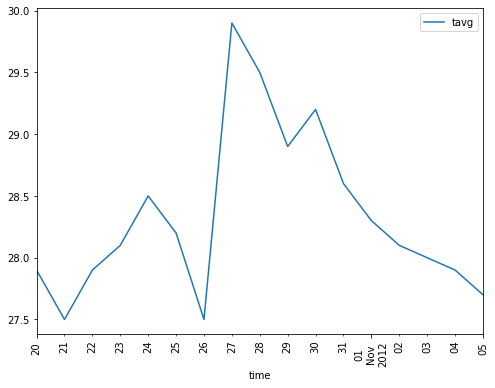

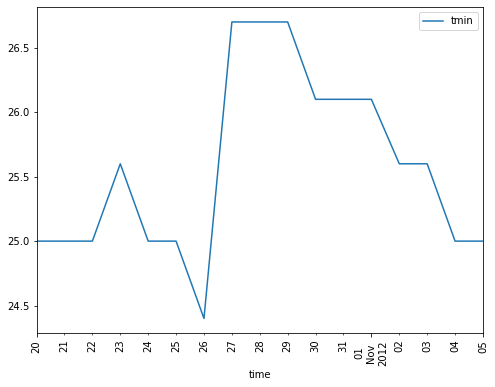

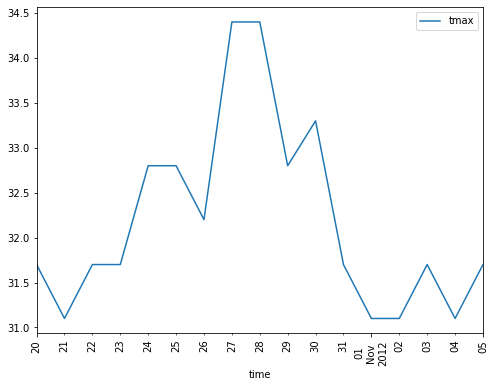

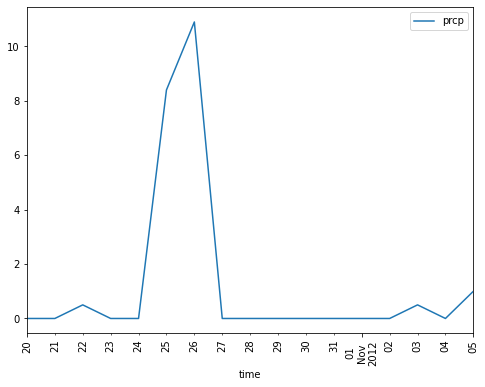

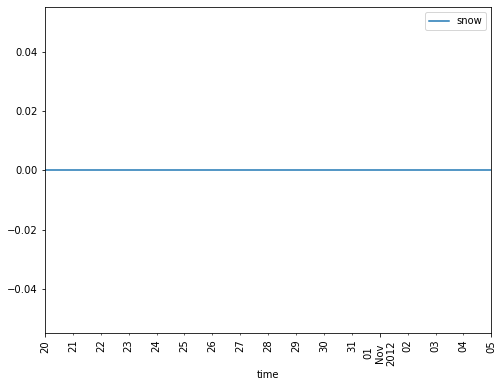

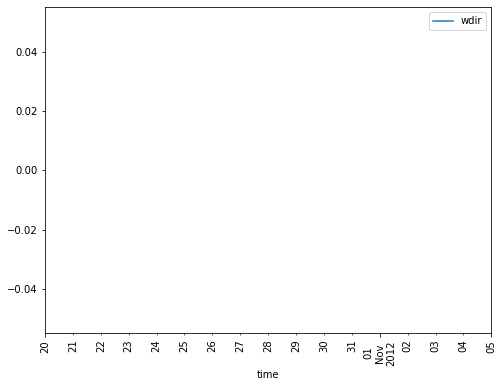

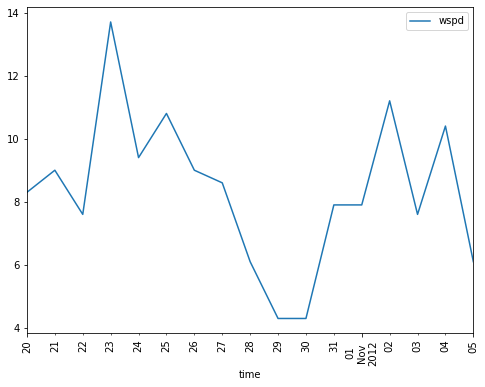

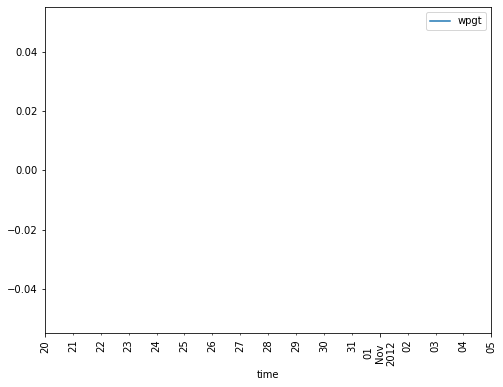

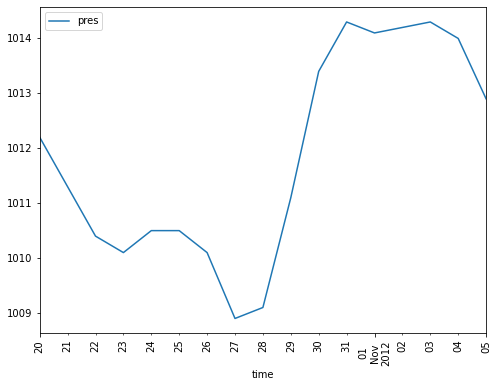

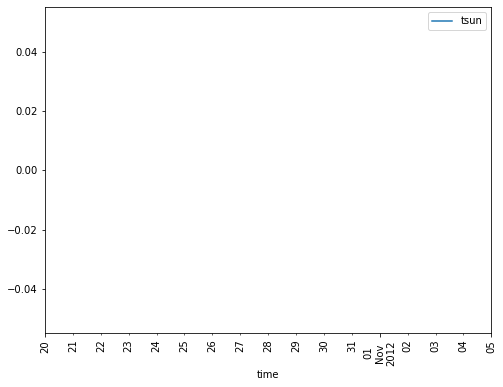

In [49]:
# lets take a look at the data from 20.10 - 5.11
data_15 = data[(data['time'] >= '2012-10-20') & (data['time'] <= '2012-11-5') ]

# and visualize again
column_list = data_15.columns
for col in column_list[2:]:
    data_15[data_15['icao'] == 'TJSJ'].plot(kind='line', x='time', y=col, figsize=(8,6), rot=90)